In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [261]:
train_set = pd.read_excel('recruiting_zeta-disease_training-data_take-home-challenge.xlsx')
test_set = pd.read_excel('recruiting_zeta-disease_prediction-data_take-home-challenge.xlsx')

In [262]:
train_set.shape, test_set.shape

((800, 9), (20, 9))

In [263]:
train_set.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


columns with zeros that should more than likely have a "truer": bmi, blood_pressure, insulin_test, cardio

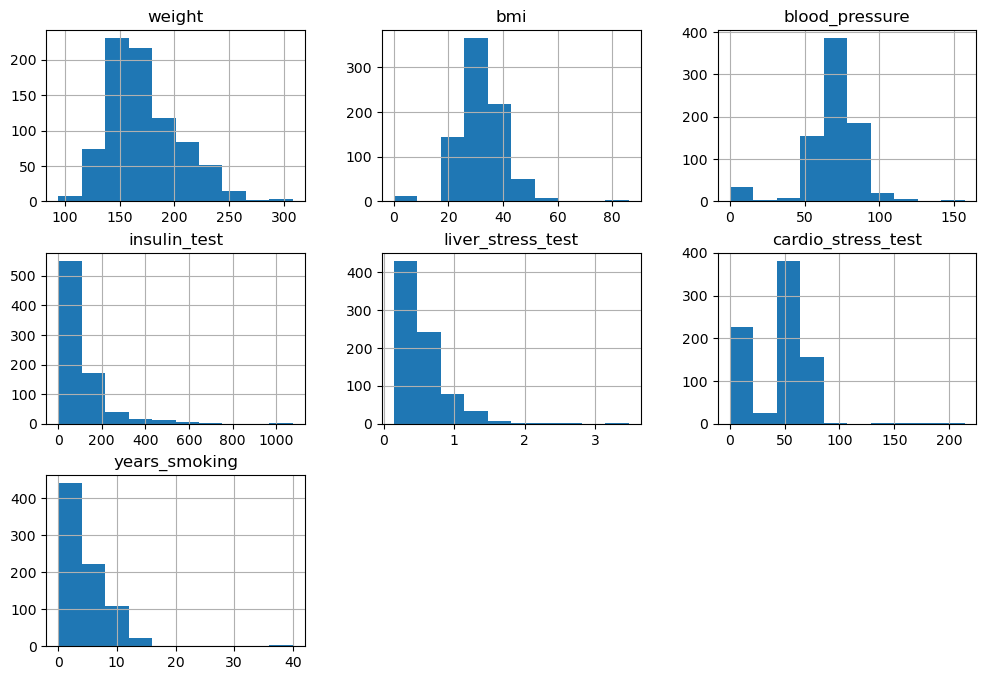

In [264]:
train_set[train_set.columns[1:-1]].hist(bins=10, figsize=(12, 8))
plt.show()

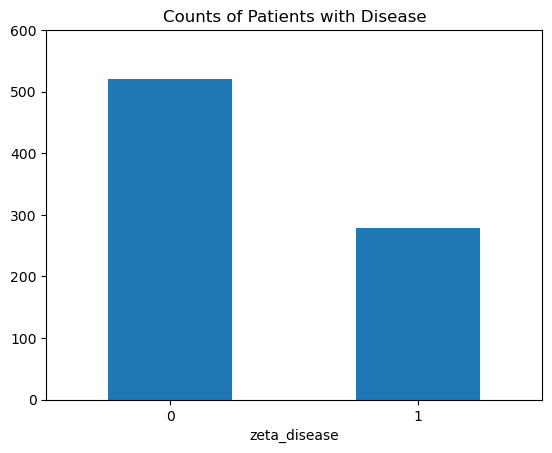

In [265]:
train_set.zeta_disease.value_counts().plot(
    kind='bar',
    rot=0,
    title='Counts of Patients with Disease'
)
plt.ylim(0, 600)
plt.show()

In [266]:
train_set.loc[train_set['bmi'] < 1]

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
27,66,186,0.0,82,0,0.7028,0,5,0
146,18,152,0.0,75,0,0.6348,53,0,0
227,21,155,0.0,0,0,0.3678,0,7,0
354,23,164,0.0,0,0,0.2518,0,6,0
447,22,144,0.0,0,0,0.3188,0,0,0
467,27,165,0.0,0,0,0.3238,0,10,1
509,18,134,0.0,0,0,0.3668,0,2,0
522,51,175,0.0,96,0,0.2948,0,8,1
687,18,168,0.0,64,89,1.7938,53,0,0
711,19,130,0.0,0,0,0.2368,0,3,0


In [267]:
train_set.loc[train_set['blood_pressure'] < 1]

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
25,28,141,29.8,0,0,0.5638,0,6,0
68,41,167,33.8,0,0,0.9948,0,0,0
74,25,196,27.5,0,0,0.3028,0,2,1
77,29,150,30.0,0,0,0.5468,0,7,1
80,26,165,35.3,0,0,0.1968,0,10,0
102,28,195,44.2,0,0,0.6928,0,0,1
106,21,169,32.4,0,0,0.2038,0,0,1
109,22,188,36.3,0,0,0.9958,0,0,1
110,28,140,28.0,0,0,0.6728,0,4,0
112,38,179,38.5,0,0,0.3668,0,2,0


Data Cleaning/Imputing

In [268]:
test_set.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0
mean,34.750000,178.800000,34.480000,78.500000,145.050000,1.569600,61.950000,6.050000,NaN
std,11.511436,27.935264,6.628773,14.005638,75.964309,0.230356,9.703363,3.471311,NaN
min,19.000000,120.000000,25.800000,59.000000,50.000000,1.249800,43.000000,2.000000,NaN
25%,26.250000,153.250000,30.250000,69.750000,76.250000,1.411800,55.750000,3.000000,NaN
50%,34.500000,188.500000,33.150000,72.500000,137.000000,1.483300,60.000000,5.500000,NaN
75%,44.250000,197.750000,37.600000,89.250000,167.750000,1.737800,68.000000,7.500000,NaN
max,60.000000,216.000000,50.700000,108.000000,362.000000,2.050800,83.000000,13.000000,NaN


In [269]:
# test set doesn't contain any "missing" data
# will use age bins to start helping to impute values. 
# I"m assuming that some of the data is "age" and "weight" specifc initially 
# smoking is important as well, you could assume that it will affect things
# such as bmi, weight, and cardio test

age_bins = pd.cut(
    train_set.age,
    bins=[0, 18, 38, 58, 78, 98, np.inf],
    labels=["18", "19-38", "39-58", "59-78", "79-98", "98+"]
)
train_set['age_bin'] = age_bins

In [270]:
train_copy = train_set.copy()
train_copy['bmi'] = train_copy['bmi'].replace(0, np.nan)
train_copy['bmi'] = train_copy.groupby(["age_bin"], observed=True)['bmi']\
    .transform(lambda x: x.fillna(x.median()))

In [271]:
train_copy['weight_kg'] = train_copy['weight'] / 2.205
train_copy['height_m'] = np.sqrt(train_copy['weight_kg'] / train_copy['bmi'])
train_copy.head(10)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,age_bin,weight_kg,height_m
0,54,189,27.1,80,0,1.5038,0,10,0,39-58,85.714286,1.778451
1,23,150,38.5,68,71,0.3868,55,2,0,19-38,68.027211,1.329263
2,47,186,29.9,90,0,0.2728,0,7,0,39-58,84.353741,1.679641
3,18,150,30.8,70,1033,0.6598,56,0,0,18,68.027211,1.486161
4,24,160,32.4,74,125,0.7608,59,2,0,19-38,72.562358,1.496522
5,49,158,27.0,80,0,0.3218,0,2,1,39-58,71.655329,1.629080
6,20,154,27.8,64,116,0.5168,53,0,0,19-38,69.841270,1.585016
7,37,167,34.5,88,145,0.4658,54,1,1,19-38,75.736961,1.481646
8,21,162,34.8,80,132,0.2798,75,1,0,19-38,73.469388,1.452993
9,19,186,31.2,70,0,1.2448,0,4,1,19-38,84.353741,1.644277


In [272]:
bmi_bins = pd.cut(
    train_copy.bmi,
    bins=[18, 26, 34, 42, 50, 58, 66, 74, 82, 100],
    labels=[f"bin{i}" for i in range(9)]
)
train_copy['bmi_bin'] = bmi_bins
train_copy

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,age_bin,weight_kg,height_m,bmi_bin
0,54,189,27.1,80,0,1.5038,0,10,0,39-58,85.714286,1.778451,bin1
1,23,150,38.5,68,71,0.3868,55,2,0,19-38,68.027211,1.329263,bin2
2,47,186,29.9,90,0,0.2728,0,7,0,39-58,84.353741,1.679641,bin1
3,18,150,30.8,70,1033,0.6598,56,0,0,18,68.027211,1.486161,bin1
4,24,160,32.4,74,125,0.7608,59,2,0,19-38,72.562358,1.496522,bin1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90,78,0.5578,42,3,0,19-38,73.015873,1.603428,bin1
796,37,165,33.7,60,0,0.3078,69,6,1,19-38,74.829932,1.490125,bin1
797,27,166,25.6,74,0,0.2638,0,5,0,19-38,75.283447,1.714864,bin0
798,109,139,28.1,66,94,0.2298,53,1,0,98+,63.038549,1.497787,bin1


In [273]:
train_copy['blood_pressure'] = train_copy['blood_pressure'].replace(0, np.nan)
train_copy['blood_pressure'] = train_copy.groupby(["age_bin", "bmi_bin"], observed=False)['blood_pressure']\
    .transform(lambda x: x.fillna(x.median()))

In [274]:
train_copy['insulin_test'] = train_copy['insulin_test'].replace(0, np.nan)
train_copy['insulin_test'] = train_copy.groupby(["age_bin"], observed=True)['insulin_test']\
    .transform(lambda x: x.fillna(x.median()))

train_copy.isna().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
age_bin               0
weight_kg             0
height_m              0
bmi_bin               0
dtype: int64

In [275]:
train_copy['cardio_stress_test'] = train_copy['cardio_stress_test'].replace(0, np.nan)
train_copy['cardio_stress_test'] = train_copy.groupby(
    ["age_bin", "bmi_bin"],
    observed=True
)['cardio_stress_test'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# I will be leaving years smoking alone because its possible for someone
# to not be a smoker, despite the test set containing all smokers

# model building
from sklearn.model_selection import train_test_split, KFold, cross_val_score
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier

In [278]:
columns = [
    'age', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test',
    'cardio_stress_test', 'years_smoking','weight_kg', 'height_m'
]
X = train_copy[columns]
y = train_copy.zeta_disease
X_train, X_val, y_train, y_val = train_test_split(
    X, y, shuffle=True, stratify=y, random_state=42
)

cv = KFold(n_splits=10)

In [286]:
rfc = RandomForestClassifier(n_estimators=100)
rfc_cv = cross_val_score(
    rfc, X_train, y_train, cv=cv, scoring='accuracy'
)
rfc_cv

array([0.73333333, 0.75      , 0.8       , 0.71666667, 0.76666667,
       0.75      , 0.83333333, 0.81666667, 0.78333333, 0.83333333])

In [ ]:
hgbc = HistGradientBoostingClassifier()
hgbc_cv = cross_val_score(
    hgbc, X_train, y_train, cv=cv, scoring='accuracy'
)


array([0.75      , 0.66666667, 0.78333333, 0.68333333, 0.76666667,
       0.78333333, 0.78333333, 0.81666667, 0.76666667, 0.78333333])